In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from models.jump_vasicek import JumpVasicek
from models.vasicek import Vasicek
from evaluators.monte_carlo import MonteCarlo

In [2]:
model_params = {
    "kappa": 0.5,
    "mu_r": 0.06,
    "sigma": 0.02,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [3]:
vasicek = Vasicek(model_params)
mc_vasicek = MonteCarlo(vasicek)

In [4]:
mc_vasicek._simulate_paths(m=365, r0=0.04, n=1000, T=3)

(0.8635999055801137, 0.03210801123995473)

In [5]:
mc_vasicek._simulate_paths_anti(m=365, r0=0.04, n=1000, T=3)

(0.8620998363341156, 0.0008320230084011258)

In [6]:
vasicek.exact(r0=0.04, T=3)

0.8622146550422263

In [7]:
jump_vasicek = JumpVasicek(model_params)
mc_jump_vasicek = MonteCarlo(jump_vasicek)

In [8]:
mc_jump_vasicek._simulate_paths(m=365, r0=0.04, n=1000, T=3)

(0.8641409702926697, 0.05861372069965134)

In [9]:
mc_jump_vasicek._simulate_paths_anti(m=365, r0=0.04, n=1000, T=3)

(0.863533278910628, 0.0028196493531378007)

In [11]:
mc_jump_vasicek._simulate_paths_cv(m=365, r0=0.04, n=1000, T=3, exact_model_class=Vasicek)

(0.8689012391188677, 0.06963364713536598)

In [10]:
T = np.arange(1, 21)
prices_class = np.empty(len(T))
std_class = np.empty(len(T))
prices_anti = np.empty(len(T))
std_anti = np.empty(len(T))

In [11]:
for t in T:
    prices_class[t-1], std_class[t-1] = mc_jump_vasicek._simulate_paths(m=36, r0=0.04, n=250, T=t)
    prices_anti[t-1], std_anti[t-1] = mc_jump_vasicek._simulate_paths_anti(m=36, r0=0.04, n=250, T=t)

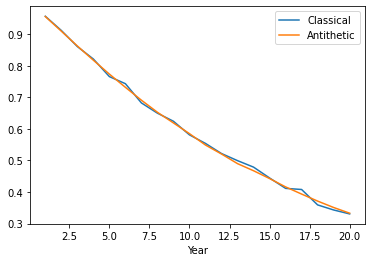

In [12]:
price_df = pd.concat([pd.Series(prices_class), pd.Series(prices_anti)], axis=1)
price_df.index = pd.Index(T, name="Year")
price_df.columns = ["Classical", "Antithetic"]
price_df.plot()

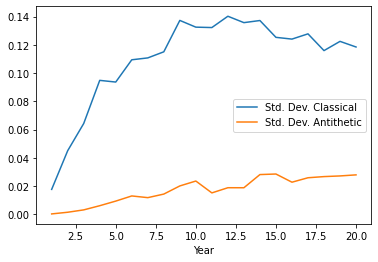

In [13]:
std_df = pd.concat([pd.Series(std_class), pd.Series(std_anti)], axis=1)
std_df.index = pd.Index(T, name="Year")
std_df.columns = ["Std. Dev. Classical", "Std. Dev. Antithetic"]
std_df.plot()